In [1]:
## day8 ## 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as plt
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

In [2]:
names1880=pd.read_csv("data/babynames/yob1880.txt",
                     names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [3]:

years=range(1880,2011)
pieces=[]

for year in years:
    path="data/babynames/yob%d.txt" % year
    frame=pd.read_csv(path, names=['name','sex','births'])
    frame['year']=year
    pieces.append(frame)
names=pd.concat(pieces, ignore_index=True)
names.shape

(1690784, 4)

In [4]:
names.groupby(['year','sex']).births.sum()

year  sex
1880  F        90993
      M       110493
1881  F        91955
      M       100748
1882  F       107851
      M       113687
1883  F       112322
      M       104632
1884  F       129021
      M       114445
1885  F       133056
      M       107802
1886  F       144538
      M       110785
1887  F       145983
      M       101412
1888  F       178631
      M       120857
1889  F       178369
      M       110590
1890  F       190377
      M       111026
1891  F       185486
      M       101198
1892  F       212350
      M       122038
1893  F       212908
      M       112319
1894  F       222923
      M       115775
              ...   
1996  F      1751681
      M      1892700
1997  F      1739331
      M      1883571
1998  F      1765390
      M      1909676
1999  F      1772139
      M      1918267
2000  F      1813960
      M      1961702
2001  F      1798284
      M      1940498
2002  F      1794358
      M      1938941
2003  F      1824406
      M      1972439
200

In [5]:
# 분모 : 해당성별의 전체 인원수 [연도 /성별]
# 모집단의 기준 ; 연도 & 성별

In [6]:
def add_prop(group):
    group['prop']=group.births / group.births.sum() # 해당이름이 연도별 차지비율
    return group
    
#     group.info()
#     print(group)
#     return group
names=names.groupby(['year','sex']).apply(add_prop)
print(names)
# names가 그룹화되어서 들어간다 
# names데이터가 성별 년도로 그룹화되어진것 
# 그룹화된 names에 대해서 출생자수의 합계를 구해보자
# 

              name sex  births  year      prop
0             Mary   F    7065  1880  0.077643
1             Anna   F    2604  1880  0.028618
2             Emma   F    2003  1880  0.022013
3        Elizabeth   F    1939  1880  0.021309
4           Minnie   F    1746  1880  0.019188
5         Margaret   F    1578  1880  0.017342
6              Ida   F    1472  1880  0.016177
7            Alice   F    1414  1880  0.015540
8           Bertha   F    1320  1880  0.014507
9            Sarah   F    1288  1880  0.014155
10           Annie   F    1258  1880  0.013825
11           Clara   F    1226  1880  0.013474
12            Ella   F    1156  1880  0.012704
13        Florence   F    1063  1880  0.011682
14            Cora   F    1045  1880  0.011484
15          Martha   F    1040  1880  0.011429
16           Laura   F    1012  1880  0.011122
17          Nellie   F     995  1880  0.010935
18           Grace   F     982  1880  0.010792
19          Carrie   F     949  1880  0.010429
20           

In [7]:
# 연도별 성별에 따른 빈도수가 가장 높은 이름 1000개 추출
def get_top1000(group):
    return(group.sort_values(by='births', ascending=False)[:1000])
    
#     print(group)
grouped=names.groupby(['year', 'sex'])
top1000=grouped.apply(get_top1000)
top1000.index=np.arange(len(top1000))
top1000.index
# 1880 = data 2000개 ) 
top1000


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [8]:
# 이름 유행 분석
boys=top1000[top1000.sex=='M']
girls=top1000[top1000.sex=='F']
top1000


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [9]:
# 해당연도의 해당이름별 해당아이의 수 표현
total_births=top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()
# columns수 : 중복되지않은 이름의 수 
# 상위 천등안에 들어가는 이름들의 정류의 수 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


In [10]:
sub_set=total_births[['John','Harry','Mary','Marilyn']]
sub_set.plot(subplots=True, figsize=(12,10)), title='Number of '# 가로, 세로 인치

# 점으로 나타나진것을 선으로 연결 표현한것
# 따로 따로 나누어 표현해보자

SyntaxError: can't assign to function call (<ipython-input-10-e0258a324b24>, line 2)

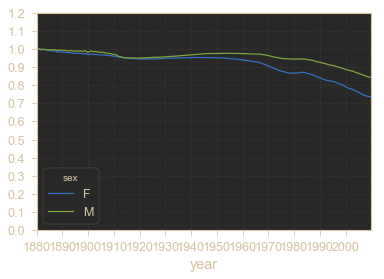

In [11]:
# 상위 1000개 에 대한 이름 비율 
table=top1000.pivot_table('prop', index='year',columns='sex',aggfunc='sum')
# table.shape
table.plot(xticks=range(1880,2010,10),yticks=np.linspace(0,1.2,13))
# 출력 그래프 모형정도 조절가능
# prop에 대한 합 
# 성별 year, sex 
# 연도별로 
# 이름이 다양해진다 

In [12]:
df=boys[boys.year==2010]
df
prop_cumsum=df.sort_values(by='prop',ascending=False).prop.cumsum() # 누적합
prop_cumsum[:10] # => 상위 10 = 0.09퍼
prop_cumsum.values.searchsorted(0.5)
# 배열로 만들어준다 .=> sorted함수 적용 가능 // 정렬된 상태에서 0.5값이 자리한 위치 (116번..117번째)
prop_cumsum.values[116] # cumsum : 누적합 

0.5006516075268308

In [13]:
df=boys[boys.year==1900]
df
in1900=df.sort_values(by='prop',ascending=False).prop.cumsum() # 누적합
in1900.values.searchsorted(0.5)
# in1900.values.searchsorted(0.5)+1
# prop_cumsum.values.searchsorted(0.5)
# prop_cumsum.values[116] # cumsum : 누적합 
# cumsum => 전체에 대한 cumsum값 

24

In [14]:
# names[names.births>=500]

In [15]:
# display(names)


In [16]:
def get_quantile_count(group,q=0.5): # quantile : 분위수를 
    group = group.sort_values(by='prop',ascending=False).prop.cumsum()
    return prop.cumsum().values.searchsorted(q)

diversity=top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity.unstack('sex')
diversity.plot(title="Number of popular names in top 50%")

NameError: name 'prop' is not defined

In [17]:
get_last_letter = lambda x : x[-1]
get_last_letter
# 이름이 x에 전달되어지고 x의 마지막글자가 들어가게된다 

<function __main__.<lambda>(x)>

In [18]:
get_last_letter = lambda x : x[:]
get_last_letter

<function __main__.<lambda>(x)>

In [19]:
last_letters=names.name.map(get_last_letter)
last_letters.name='last_letter'
last_letters.name

'last_letter'

In [20]:
# 이름을 구성하는 특정문자들을 선택적으로 추출
# 이름을 글자로 분리 => 알파벳 문자 비율의 변화( 1880...2010 )
last_letters
table = names.pivot_table('births', index=last_letters, columns=['sex','year'], aggfunc=sum)


In [21]:
subtable=table.reindex(columns=[1910,1960,2010], level='year')
subtable


sex            F               M            
year        1910 1960  2010 1910 1960   2010
last_letter                                 
Aaban        NaN  NaN   NaN  NaN  NaN    9.0
Aabid        NaN  NaN   NaN  NaN  NaN    NaN
Aabriella    NaN  NaN   NaN  NaN  NaN    NaN
Aadam        NaN  NaN   NaN  NaN  NaN    7.0
Aadan        NaN  NaN   NaN  NaN  NaN   11.0
Aadarsh      NaN  NaN   NaN  NaN  NaN    NaN
Aaden        NaN  NaN   NaN  NaN  NaN  448.0
Aadesh       NaN  NaN   NaN  NaN  NaN    NaN
Aadhav       NaN  NaN   NaN  NaN  NaN   13.0
Aadhavan     NaN  NaN   NaN  NaN  NaN    5.0
Aadhya       NaN  NaN  19.0  NaN  NaN    NaN
Aadi         NaN  NaN   NaN  NaN  NaN   54.0
Aadil        NaN  NaN   NaN  NaN  NaN   11.0
Aadin        NaN  NaN   NaN  NaN  NaN   18.0
Aadison      NaN  NaN   NaN  NaN  NaN    NaN
Aadit        NaN  NaN   NaN  NaN  NaN   23.0
Aadith       NaN  NaN   NaN  NaN  NaN    NaN
Aaditri      NaN  NaN   5.0  NaN  NaN    NaN
Aaditya      NaN  NaN   NaN  NaN  NaN   37.0
Aadon        NaN  NaN   NaN  NaN  NaN    NaN
Aadya        NaN  NaN  33.0  NaN  NaN    NaN
Aadyn        NaN  NaN   NaN  NaN  NaN   38.0
Aafreen      NaN  NaN   NaN  NaN  NaN    NaN
Aage         NaN  NaN   NaN  NaN  NaN    NaN
Aagot        NaN  NaN   NaN  NaN  NaN    NaN
Aahan        NaN  NaN   NaN  NaN  NaN   20.0
Aahana       NaN  NaN  64.0  NaN  NaN    NaN
Aahil        NaN  NaN   NaN  NaN  NaN   14.0
Aahliyah     NaN  NaN   NaN  NaN  NaN    NaN
Aahna        NaN  NaN   7.0  NaN  NaN    NaN
...          ...  ...   ...  ...  ...    ...
Zyran        NaN  NaN   NaN  NaN  NaN    5.0
Zyree        NaN  NaN   NaN  NaN  NaN    7.0
Zyreion      NaN  NaN   NaN  NaN  NaN    NaN
Zyrek        NaN  NaN   NaN  NaN  NaN    NaN
Zyrell       NaN  NaN   NaN  NaN  NaN   12.0
Zyren        NaN  NaN   NaN  NaN  NaN    8.0
Zyreon       NaN  NaN   NaN  NaN  NaN    NaN
Zyrese       NaN  NaN   NaN  NaN  NaN    NaN
Zyrhiana     NaN  NaN   NaN  NaN  NaN    NaN
Zyria        NaN  NaN  15.0  NaN  NaN    NaN
Zyriah       NaN  NaN  29.0  NaN  NaN    NaN
Zyrian       NaN  NaN   NaN  NaN  NaN    NaN
Zyriana      NaN  NaN   5.0  NaN  NaN    NaN
Zyrianna     NaN  NaN   NaN  NaN  NaN    NaN
Zyrie        NaN  NaN   NaN  NaN  NaN    NaN
Zyriel       NaN  NaN   NaN  NaN  NaN    NaN
Zyrihanna    NaN  NaN   5.0  NaN  NaN    NaN
Zyrion       NaN  NaN   NaN  NaN  NaN   13.0
Zyriyah      NaN  NaN   6.0  NaN  NaN    NaN
Zyron        NaN  NaN   NaN  NaN  NaN    7.0
Zyrus        NaN  NaN   NaN  NaN  NaN    NaN
Zysean       NaN  NaN   NaN  NaN  NaN    NaN
Zyshaun      NaN  NaN   NaN  NaN  NaN    NaN
Zyshawn      NaN  NaN   NaN  NaN  NaN    9.0
Zyshon       NaN  NaN   NaN  NaN  NaN    NaN
Zyshonne     NaN  NaN   NaN  NaN  NaN    NaN
Zytavious    NaN  NaN   NaN  NaN  NaN    6.0
Zyvion       NaN  NaN   NaN  NaN  NaN    NaN
Zyyanna      NaN  NaN   6.0  NaN  NaN    NaN
Zzyzx        NaN  NaN   NaN  NaN  NaN    5.0

[88496 rows x 6 columns]

In [22]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [11]:
# 연도별 신생아들의 성별 분포확인
# total_births=names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
# total_births.plot()
# total_births

In [ ]:
# 각각의 연도별 성별 각각의 이름이 차지한 비중

In [ ]:
# 169만의 의미 : 각연도별. 성별에 대한 종류의 합
# names 컬럼에 하나만있는게 아니라 여러 연도에 거쳐 존재함

